In [61]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [62]:
def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [63]:
torch.manual_seed(0)

In [64]:
class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [65]:
dataset = Data()
dataset.y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

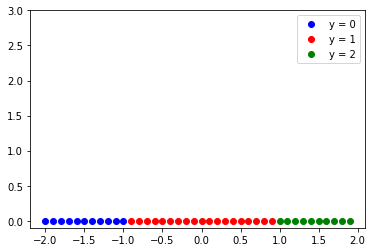

In [66]:
plot_data(data_set=dataset)

In [67]:
model = nn.Sequential(nn.Linear(1,3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [69]:
trainLoader = DataLoader(dataset = dataset, batch_size=5)

In [70]:
LOSS = []
def trainModel(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
            plot_data(dataset, model)
        for x, y in trainLoader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            optimizer.step()

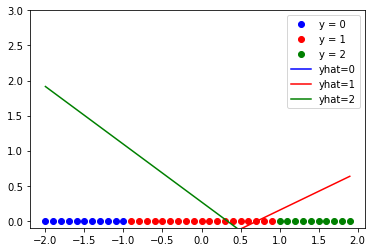

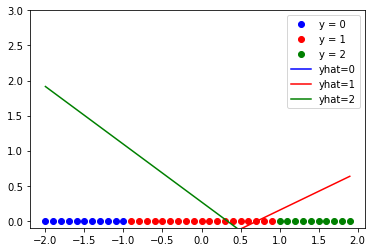

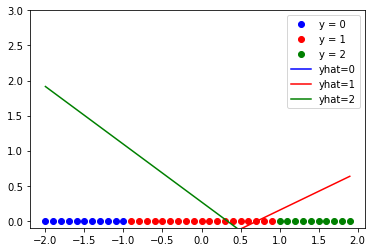

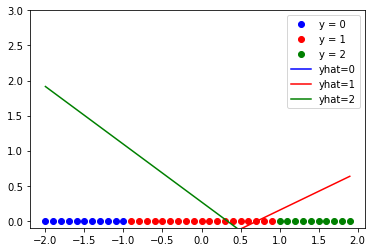

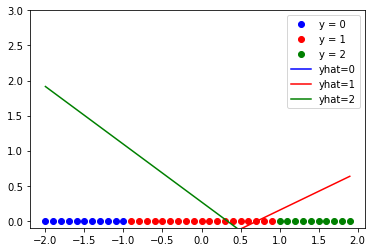

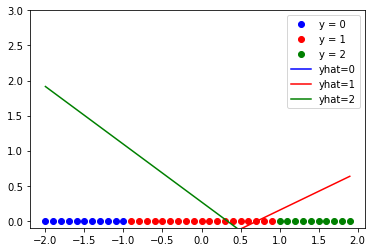

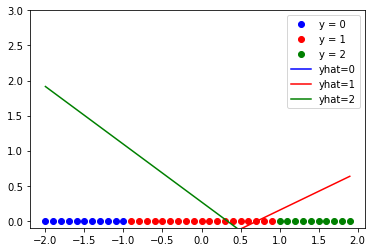

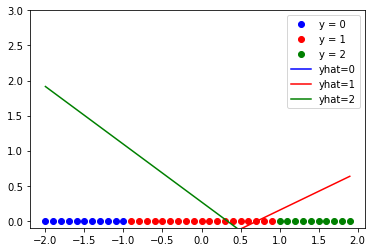

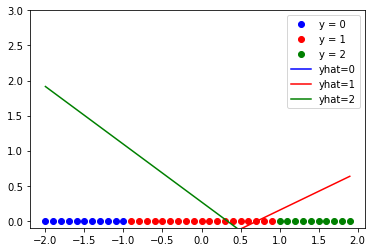

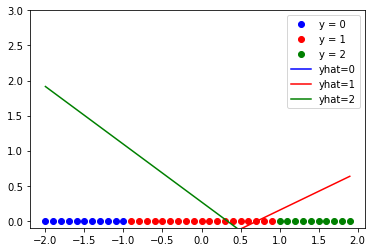

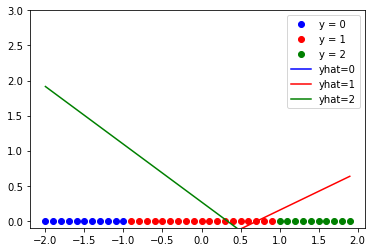

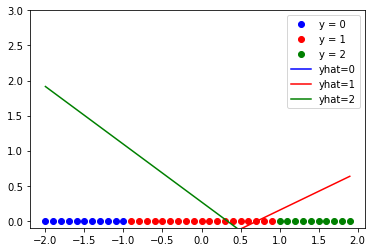

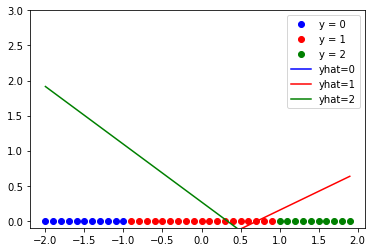

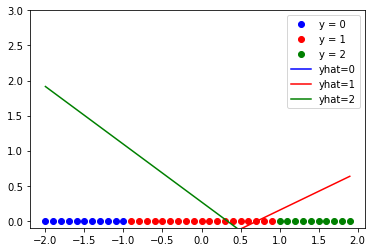

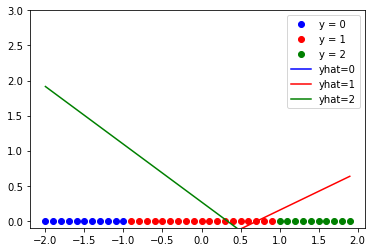

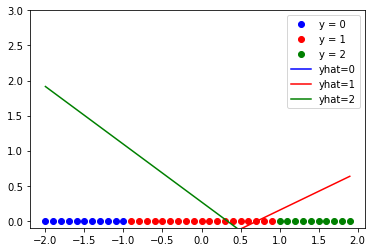

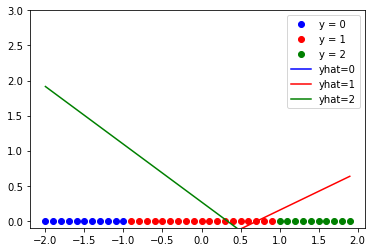

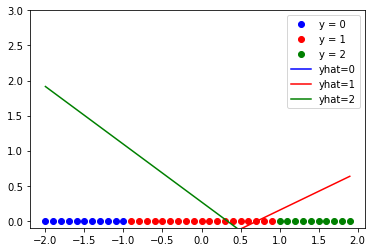

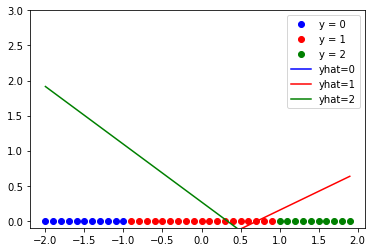

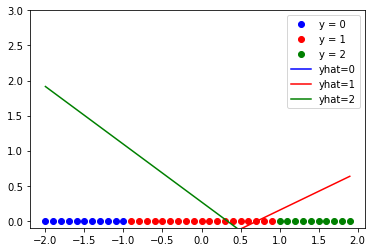

In [71]:
trainModel(1000)

In [72]:
z = model(dataset.x)
_, yhat = z.max(1)
print("the prediction,",yhat)

the prediction, tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [73]:
correct = (dataset.y == yhat).sum().item()
accuracy = correct/len(dataset)
print("the accuracy: ",accuracy)

the accuracy:  0.125


In [74]:
softmaxfn = nn.Softmax(dim=-1)

In [75]:
prob = softmaxfn(z)

In [77]:
print(prob)

tensor([[0.0648, 0.0310, 0.9041],
        [0.0696, 0.0352, 0.8952],
        [0.0747, 0.0399, 0.8854],
        [0.0801, 0.0451, 0.8748],
        [0.0858, 0.0510, 0.8632],
        [0.0917, 0.0576, 0.8507],
        [0.0979, 0.0649, 0.8371],
        [0.1044, 0.0731, 0.8225],
        [0.1111, 0.0821, 0.8068],
        [0.1180, 0.0921, 0.7899],
        [0.1251, 0.1031, 0.7718],
        [0.1323, 0.1152, 0.7525],
        [0.1397, 0.1284, 0.7320],
        [0.1470, 0.1427, 0.7103],
        [0.1544, 0.1582, 0.6874],
        [0.1617, 0.1749, 0.6634],
        [0.1688, 0.1928, 0.6384],
        [0.1757, 0.2119, 0.6124],
        [0.1823, 0.2322, 0.5856],
        [0.1885, 0.2535, 0.5581],
        [0.1942, 0.2758, 0.5300],
        [0.1994, 0.2990, 0.5016],
        [0.2040, 0.3230, 0.4730],
        [0.2079, 0.3477, 0.4444],
        [0.2112, 0.3728, 0.4160],
        [0.2137, 0.3983, 0.3880],
        [0.2154, 0.4241, 0.3605],
        [0.2164, 0.4498, 0.3338],
        [0.2166, 0.4754, 0.3079],
        [0.216

In [90]:
for i in range(3):
    print("probability of class", i, "is given by", prob[0,i])

probability of class 0 is given by tensor(0.0648, grad_fn=<SelectBackward0>)
probability of class 1 is given by tensor(0.0310, grad_fn=<SelectBackward0>)
probability of class 2 is given by tensor(0.9041, grad_fn=<SelectBackward0>)
